In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
tragitti = pd.read_csv('csv/alldata.csv', index_col=False)
tragitti = tragitti[(tragitti['Car'] != 0) & (tragitti['FDistance'] != 0)]

In [2]:
pre_lock_condition = (tragitti['Month'] == 3) & (tragitti['Day'] < 13)
post_lock_condition = ((tragitti['Month'] == 5) & (tragitti['Day'] >= 4)) | (tragitti['Month'] > 5)
print(len(tragitti[pre_lock_condition]), len(tragitti[post_lock_condition]))

(8347, 60083)


In [3]:
tragitti = tragitti[post_lock_condition]

In [4]:
# Velocita' media durante il giorno
def vmedia_giorno(tragitti, mezzo):
    ore = range(7, 24)
    media_giorno = []
    for ora in ore:
        tragitti_fascia_oraria = tragitti[tragitti['Hour'] == ora]
        velocita_media_oraria = (tragitti_fascia_oraria['FDistance'] * 60.) / tragitti_fascia_oraria[mezzo]
        media_giorno.append(velocita_media_oraria.mean())
    return media_giorno

lst = [
    vmedia_giorno(tragitti[(tragitti['Month'] == 5) & tragitti['Day'].between(4, 18)], 'Car'),
    vmedia_giorno(tragitti[(tragitti['Month'] == 5) & tragitti['Day'].between(18, 31)], 'Car'),
    vmedia_giorno(tragitti[(tragitti['Month'] == 6) & tragitti['Day'].between(1, 15)], 'Car'),
    vmedia_giorno(tragitti[(tragitti['Month'] == 6) & tragitti['Day'].between(15, 27)], 'Car')]

array = np.array(lst).T # transpose

confronto_vmedie_week_by_week = \
    pd.DataFrame(array, index=range(7,24), columns=['Maggio 4-17', 'Maggio 18-31', 'Giugno 1-14', 'Giugno 15-27']).round(decimals=1)
confronto_vmedie_week_by_week

,Maggio 4-17,Maggio 18-31,Giugno 1-14,Giugno 15-27
7,21.0,20.5,20.1,18.9
8,20.1,19.3,18.6,17.4
9,20.2,19.2,18.7,17.6
10,20.2,19.1,18.6,17.5
11,20.2,19.2,18.3,17.3
12,20.3,19.8,19.2,18.0
13,20.8,20.4,19.7,18.9
14,20.8,19.8,19.3,18.4
15,20.3,19.4,18.9,17.9
16,20.6,19.3,18.6,17.7


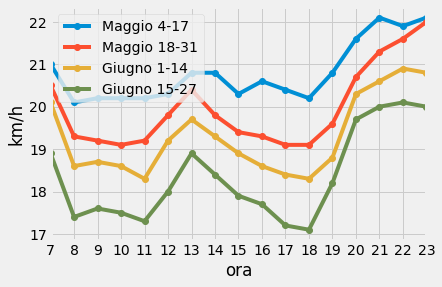

In [5]:
confronto_vmedie_week_by_week.plot(marker='o')
plt.xlabel('ora')
plt.ylabel('km/h')
plt.xticks(range(7,24,1))
plt.show()